In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from tqdm import tqdm

np.random.seed(123)

In this notebook, I implemented the Markov chain Monte Carlo (MCMC) algorithm and applied it to a toy problem.

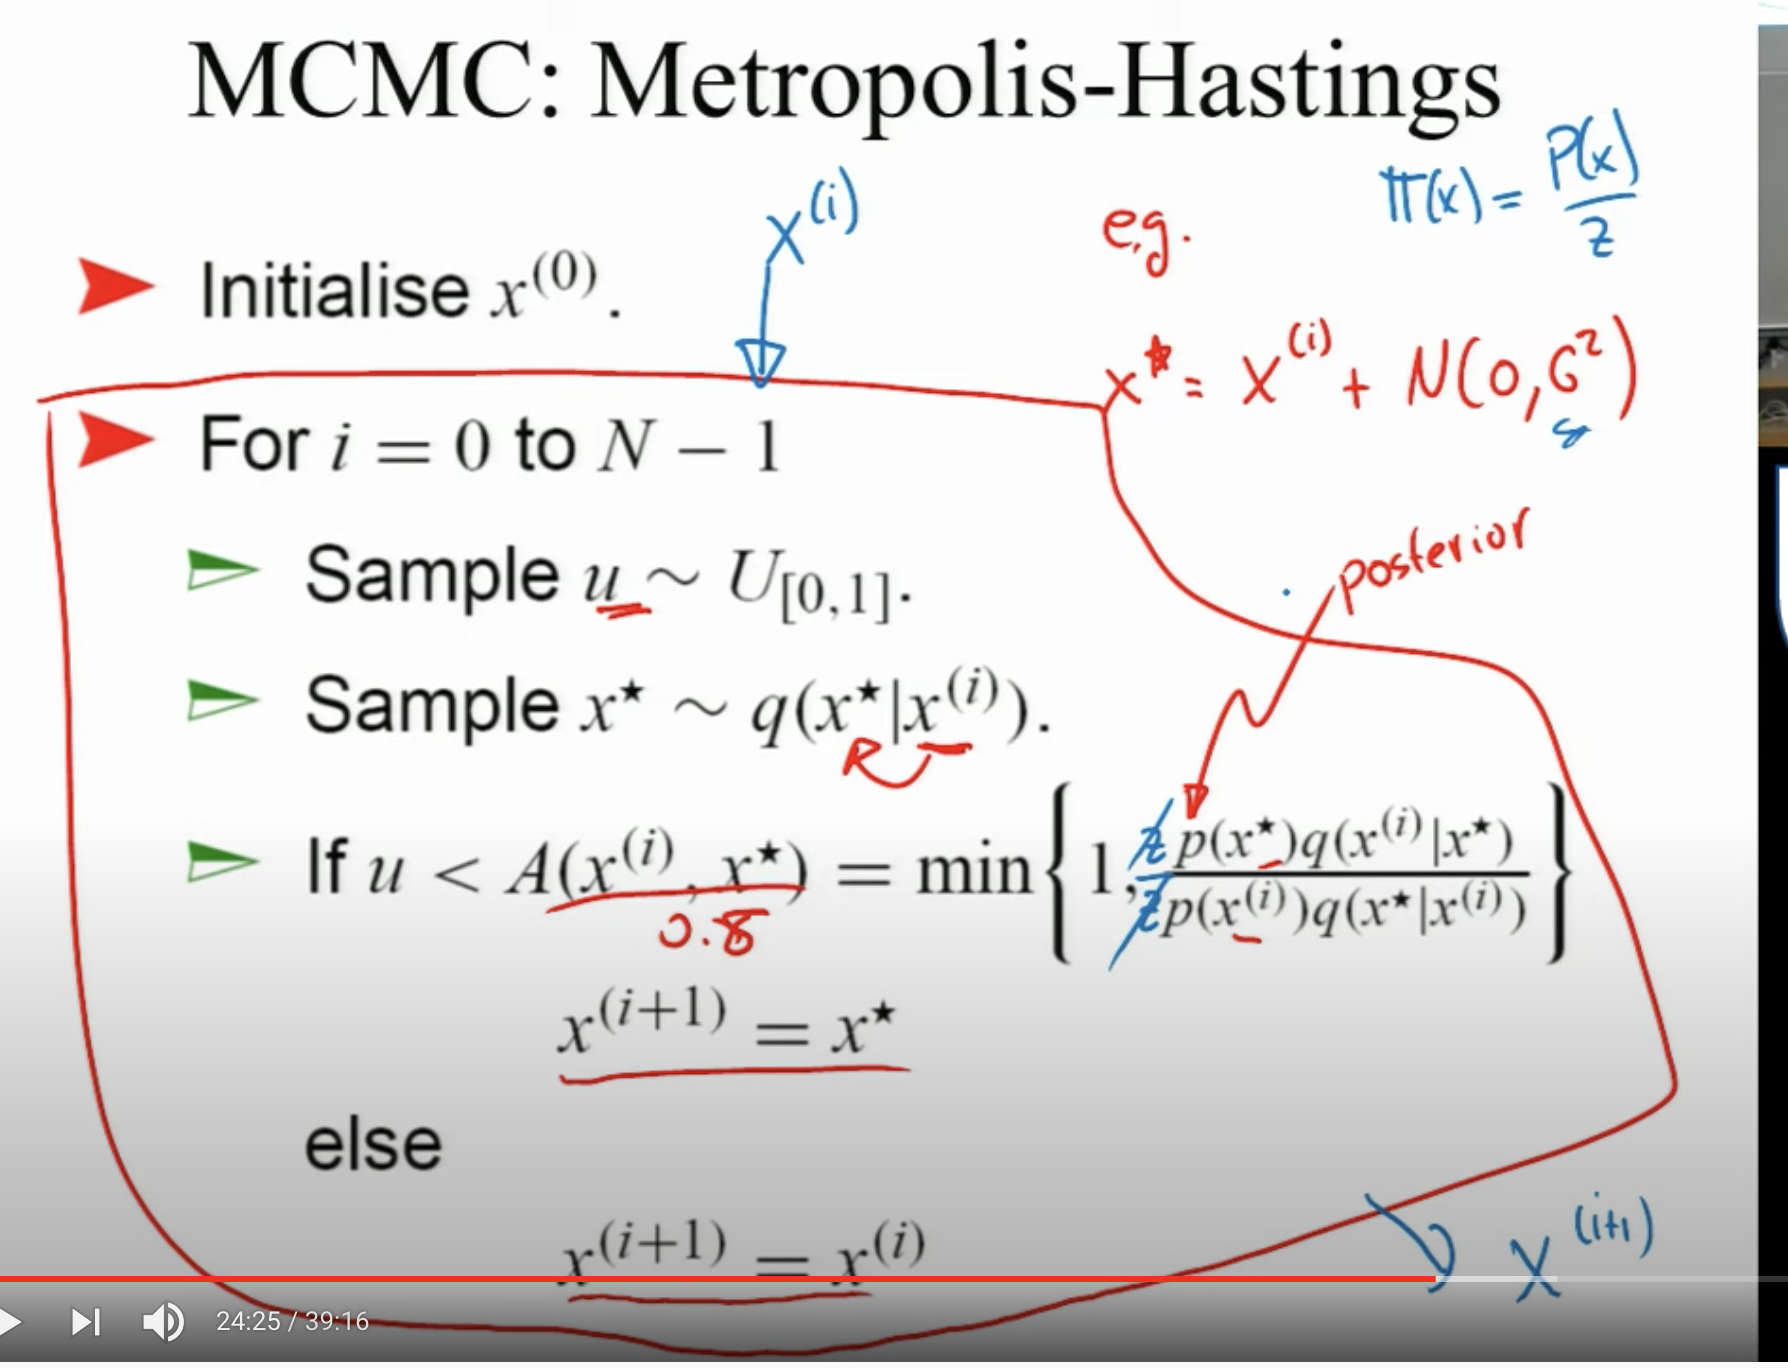

https://youtu.be/sK3cg15g8FI?t=1465

Define a target distribution:

In [2]:
def p(x):
    """Likelihood function."""
    return scipy.stats.norm.pdf(x, loc=-1, scale=3) + scipy.stats.norm.pdf(x, loc=5, scale=2)

In [3]:
def target(x):
    """True probability density distrbution with known normalization factor."""
    return p(x) / 2

In [4]:
def sample_q(x_i, q_func):
    """Samples from q distribution"""
    return x_i + q_func.rvs(1)[0]

In [5]:
def q(x_i, x_j, q_func):
    """Calculatess Pr(x_j|x_i)"""
    diff = x_j - x_i
    return q_func.pdf(diff)

In [6]:
def calc_acceptance_probability(x_i, x_star, q_func, t=1):
    """
    Args:
        t: the denominator for simulated annealing.
    """
    ratio_p = (p(x_star) / p(x_i)) ** (1 / t)
    # Note, this is one if q(x_star, x_i, q_func) == q(x_i, x_star, q_func)
    ratio_q = q(x_star, x_i, q_func) / q(x_i, x_star, q_func)
    return np.min([1, ratio_p * ratio_q])

In [7]:
def sample_mcmc(num_samples, q_func, x0=0, t=1):
    """
    Args:
        num_samples: numeber of samples to take with MCMC.
        x0: initial x, default to 0.
        q_func: the proposal probability distribution function.
        t: the denominator for simulated annealing.        
    """
    samples = []
    x = x0
    for i in tqdm(range(num_samples)):
        u = np.random.uniform(low=0, high=1, size=1)

        x_star = sample_q(x, q_func)

        pr = calc_acceptance_probability(x, x_star, q_func, t=t)

        if u < pr:
            x = x_star

        samples.append(x)
    
    return samples

Experiment with propsal functions with different variance.

When drawing 5000 samples:

100%|██████████| 5000/5000 [00:03<00:00, 1308.78it/s]


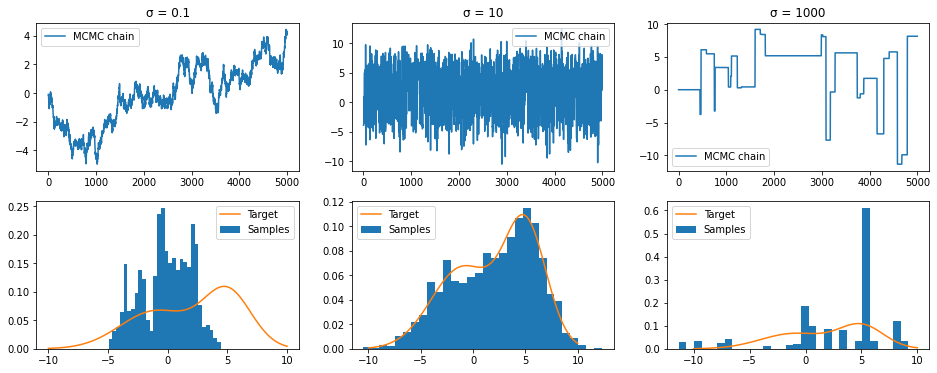

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(16, 6))
axes = axes.ravel()

for k, scale in enumerate([0.1, 10, 1000]):
    q_func = scipy.stats.norm(loc=0, scale=scale)
    samples= sample_mcmc(num_samples=5000, q_func=q_func)
    
    axes[k].plot(np.arange(len(samples)), samples, label='MCMC chain')
    axes[k].set(title=f"σ = {scale}")
    
    axes[k + 3].hist(samples, bins=30, density=True, label='Samples')
    
    xs = np.linspace(-10, 10, 100)
    axes[k + 3].plot(xs, target(xs), label='Target')
    
for _ax in axes:
    _ax.legend()

When drawing 5000 samples with simulated annealing ($t=100$):

100%|██████████| 5000/5000 [00:03<00:00, 1267.08it/s]


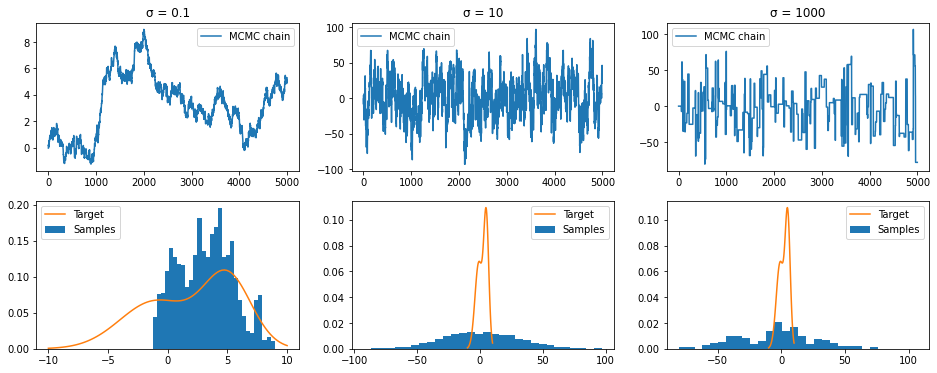

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(16, 6))
axes = axes.ravel()

for k, scale in enumerate([0.1, 10, 1000]):
    q_func = scipy.stats.norm(loc=0, scale=scale)
    samples= sample_mcmc(num_samples=5000, q_func=q_func, t=100)
    
    axes[k].plot(np.arange(len(samples)), samples, label='MCMC chain')
    axes[k].set(title=f"σ = {scale}")
    
    axes[k + 3].hist(samples, bins=30, density=True, label='Samples')
    
    xs = np.linspace(-10, 10, 100)
    axes[k + 3].plot(xs, target(xs), label='Target')
    
for _ax in axes:
    _ax.legend()

When drawing 5000 samples with simulated annealing ($t=0.01$):

100%|██████████| 5000/5000 [00:03<00:00, 1308.51it/s]


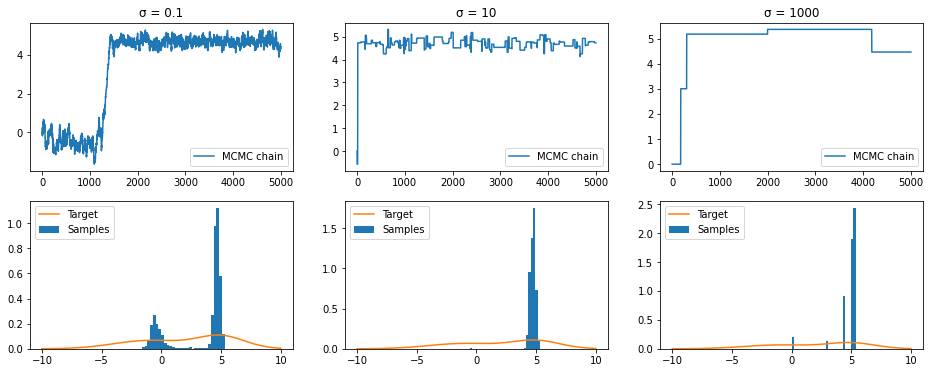

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(16, 6))
axes = axes.ravel()

for k, scale in enumerate([0.1, 10, 1000]):
    q_func = scipy.stats.norm(loc=0, scale=scale)
    samples= sample_mcmc(num_samples=5000, q_func=q_func, t=0.01)
    
    axes[k].plot(np.arange(len(samples)), samples, label='MCMC chain')
    axes[k].set(title=f"σ = {scale}")
    
    axes[k + 3].hist(samples, bins=30, density=True, label='Samples')
    
    xs = np.linspace(-10, 10, 100)
    axes[k + 3].plot(xs, target(xs), label='Target')
    
for _ax in axes:
    _ax.legend()

When drawing 10000 samples:

100%|██████████| 10000/10000 [00:10<00:00, 910.77it/s]


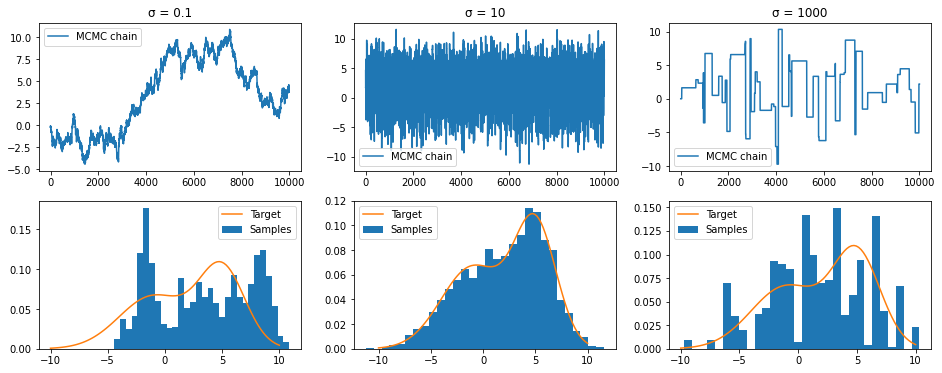

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(16, 6))
axes = axes.ravel()

for k, scale in enumerate([0.1, 10, 1000]):
    q_func = scipy.stats.norm(loc=0, scale=scale)
    samples= sample_mcmc(num_samples=10000, q_func=q_func)
    
    axes[k].plot(np.arange(len(samples)), samples, label='MCMC chain')
    axes[k].set(title=f"σ = {scale}")
    
    axes[k + 3].hist(samples, bins=30, density=True, label='Samples')
    
    xs = np.linspace(-10, 10, 100)
    axes[k + 3].plot(xs, target(xs), label='Target')
    
for _ax in axes:
    _ax.legend()

When drawing 10000 samples again:

100%|██████████| 10000/10000 [00:11<00:00, 882.34it/s]


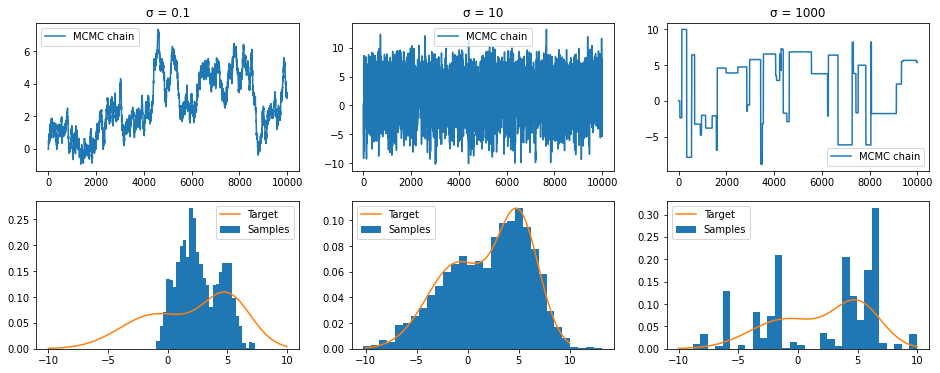

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(16, 6))
axes = axes.ravel()

for k, scale in enumerate([0.1, 10, 1000]):
    q_func = scipy.stats.norm(loc=0, scale=scale)
    samples= sample_mcmc(num_samples=10000, q_func=q_func)
    
    axes[k].plot(np.arange(len(samples)), samples, label='MCMC chain')
    axes[k].set(title=f"σ = {scale}")
    
    axes[k + 3].hist(samples, bins=30, density=True, label='Samples')
    
    xs = np.linspace(-10, 10, 100)
    axes[k + 3].plot(xs, target(xs), label='Target')
    
for _ax in axes:
    _ax.legend()

Note in the two experiments with σ = 0.1 or 1000, the distributions of the drawn samples can be quite different.